##### 新潟大学大学院医歯学総合研究科　顎顔面放射線学分野　学生演習用
Modified by H.Nishiyama<br>
Fork from :https://github.com/oreilly-japan/deep-learning-from-scratch-5<br>
<br>
テキストの版（オリジナル）では、加算する乱数を0から1としているが、乱数を加算しない元の関数との比較を追加<br>
さらに、加算する乱数を-0.5から+0.5までの範囲に変化させた場合を追加<br>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
torch.manual_seed(0)
x = torch.rand(100, 1)
y = torch.sin(2 * torch.pi * x) + torch.rand(100, 1)

In [3]:
# model
class Model(nn.Module):
    def __init__(self, input_size=1, hidden_size= 10, output_size=1):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        y = self.linear1(x)
        y = F.sigmoid(y)
        y = self.linear2(y)
        return y

In [4]:
lr = 0.2
iters = 10000

In [5]:
model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [6]:
for i in range(iters):
    y_pred = model(x)
    loss = F.mse_loss(y, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 1000 == 0:
        print(loss.item())

0.7643452286720276
0.23656320571899414
0.2322607785463333
0.22441406548023224
0.21026141941547394
0.17957870662212372
0.11798439919948578
0.08477357029914856
0.08017147332429886
0.07964649796485901


In [7]:
print(loss.item())

0.07944130152463913


書き換え：<br>
x = torch.linspace(0, 1, 100).reshape(-1, 1)<br>
==> <br>
xx = torch.linspace(0, 1, 100).reshape(-1, 1)<br>
y =  model(xx).detach().numpy()<br>
==><br>
yy = model(xx).detach().numpy()<br>
追加：y2 = sin (2π * xx) として誤差を含まない元のsin関数<br>

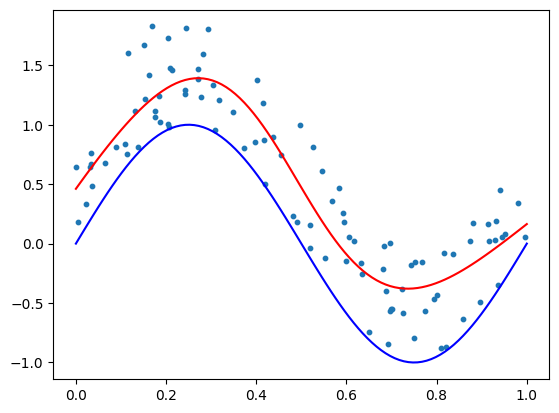

In [8]:
# plot
import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
#--- xx: Tensor
xx = torch.linspace(0, 1, 100).reshape(-1, 1)
#-- yy: ndarray
yy = model(xx).detach().numpy()
#=+ added y2 as original function
y2 = torch.sin(2 * torch.pi * xx)
plt.plot(xx, yy, color='red')
#=+ added plot of original cos(2π * x) function as blue line
plt.plot(xx, y2, color='blue')
plt.show()

#### 加算する乱数を0から1ではなく、-0.5から+0.5とした追加の版

In [9]:
torch.manual_seed(0)
x = torch.rand(100, 1)
y = torch.sin(2 * torch.pi * x) + torch.rand(100, 1) - 0.5

In [10]:
model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [11]:
for i in range(iters):
    y_pred = model(x)
    loss = F.mse_loss(y, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 1000 == 0:
        print(loss.item())

0.5517734289169312
0.2364884614944458
0.23135173320770264
0.21814849972724915
0.1795443296432495
0.10872980207204819
0.0835554376244545
0.0819750428199768
0.0816410481929779
0.18642379343509674


In [12]:
print(loss.item())

0.08097182959318161


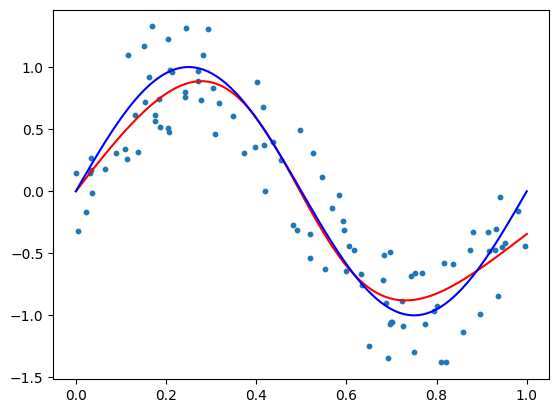

In [13]:
# plot
# import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
#--- xx: Tensor
xx = torch.linspace(0, 1, 100).reshape(-1, 1)
#-- yy: ndarray
yy = model(xx).detach().numpy()
#=+ added y2 as original function
y2 = torch.sin(2 * torch.pi * xx)
plt.plot(xx, yy, color='red')
#=+ added plot of original cos(2π * x) function as blue line
plt.plot(xx, y2, color='blue')
plt.show()